Accuracy: 33.33%


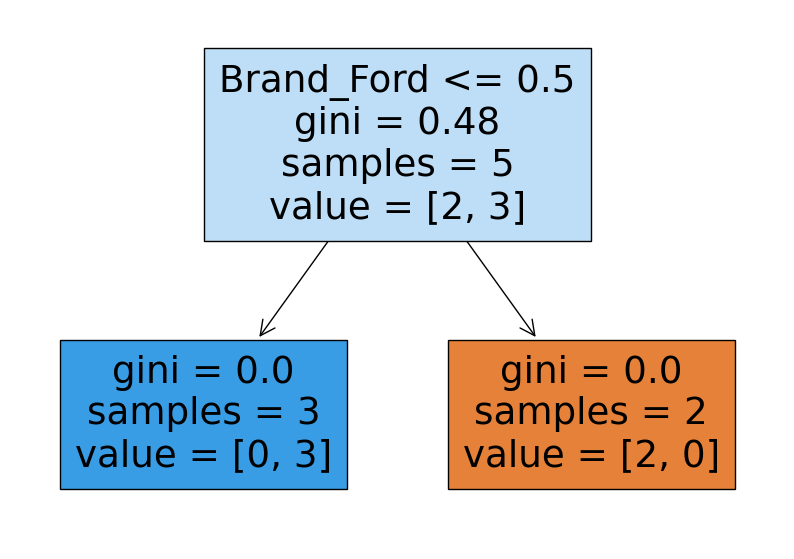

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Sample car data
data = {
    'Age': [3, 5, 2, 8, 1, 7, 4, 6],
    'Price': [20000, 15000, 30000, 10000, 35000, 12000, 25000, 14000],
    'Brand': ['Toyota', 'Honda', 'BMW', 'Ford', 'Mercedes', 'Audi', 'Toyota', 'Ford'],
    'Purchased': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

# Create DataFrame
df = pd.DataFrame(data)

# Features and target
X = df.drop('Purchased', axis=1)  # Independent variables
y = df['Purchased']               # Dependent variable (target)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define categorical and numerical columns
categorical_features = ['Brand']
numerical_features = ['Age', 'Price']

# Preprocessing: Encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # Keep numerical data as is
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical data, ignoring unknowns
    ])

# Create a pipeline with the preprocessor and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Optional: Visualize the Decision Tree
plt.figure(figsize=(10, 7))
plot_tree(pipeline.named_steps['classifier'], filled=True, feature_names=numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()))
plt.show()
